In [20]:
# Descomente isso para bloquear os warnings do sklearn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from typing import List, Dict, Tuple

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, Perceptron, LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

from Scripts.data_processing import DataManager
from Scripts.model_analysis import ModelEvaluator

In [4]:
DATA_PATH = 'dados/dados_treino.csv'
manager = DataManager(DATA_PATH)
print(manager.users)

['#ID4940', '#ID9181']


Com o sistema aqui implementado é possível estudar o comportamento de diversos modelos nos dados disponibilizados. Com isso, é possível descartar os modelos que evidentemente não possuem uma boa performance geral, observar o comportamento dos modelos com procedimentos diferentes para lidar com questões tais como o desbalanceamento das classes (e.g. observar se o SMOTE ajuda), e detectar modelos candidatos para serem utilizados.

O sistema é capaz de retornar o modelo com melhor desempenho de acordo com alguma métrica, como a acurácia, e assim seria possível usá-lo para a seleção automática do modelo ótimo para cada usuário. Pode-se notar que a acurácia nem sempre é um bom critério de avaliação do modelo por conta do desbalanceamento, portanto outros critérios podem ser utilizados, e na seleção do modelo final outras questões se tornariam relevantes, como o custo de processamento e a facilidade de compreensão e interpretabilidade.



In [9]:
classification_models = [(SVC, {'kernel': 'linear'}),
                         (SVC, {'kernel': 'poly'}),
                         (SVC, {'kernel': 'rbf'}),
                         (SVC, {'kernel': 'sigmoid'}),
                         (LogisticRegression, {}),
                         (LogisticRegression, {'penalty': 'l1', 'solver':'liblinear'}),
                         (LogisticRegression, {'penalty': 'elasticnet', 'solver': 'saga', 'l1_ratio':0.2}),
                         (LogisticRegression, {'penalty': 'none'}),
                         (Perceptron, {}),
                         (Perceptron, {'penalty': 'l2'}),
                         (Perceptron, {'penalty': 'l1'}),
                         (Perceptron, {'penalty': 'elasticnet'}),
                         (DecisionTreeClassifier, {}),
                         (MLPClassifier, {}),
                         (MLPClassifier, {'activation': 'logistic'}),]

regression_models = [(SVR, {'kernel': 'linear'}),
                     (SVR, {'kernel': 'poly'}),
                     (SVR, {'kernel': 'rbf'}),
                     (SVR, {'kernel': 'sigmoid'}),
                     (LinearRegression, {}),
                     (DecisionTreeRegressor, {}),
                     (MLPRegressor, {})]

model_eval = ModelEvaluator(classification_models, regression_models)

# Avaliação dos modelos de classificação separando os dados em um conjunto de treino e teste.

### Sem balanceamento de classes

0    1712
1     860
Name: gostou, dtype: int64
Evaluating model: SVC(kernel='linear')


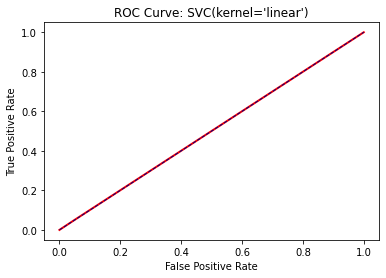

Evaluating model: SVC(kernel='poly')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


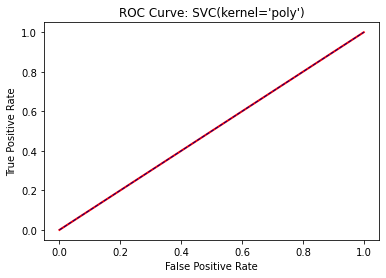

Evaluating model: SVC()


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


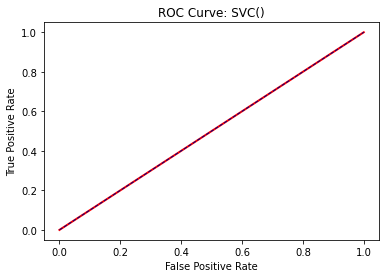

Evaluating model: SVC(kernel='sigmoid')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


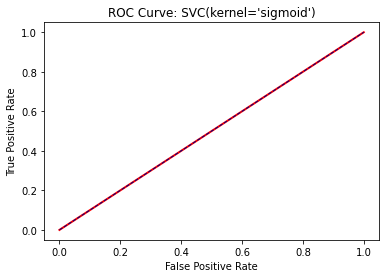

/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating model: LogisticRegression()


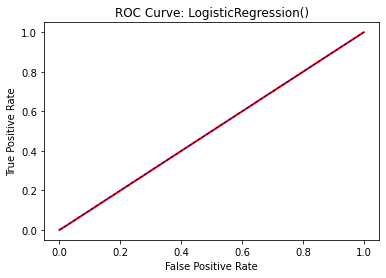

Evaluating model: LogisticRegression(penalty='l1', solver='liblinear')


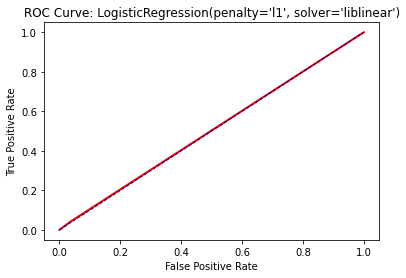

Evaluating model: LogisticRegression(l1_ratio=0.2, penalty='elasticnet', solver='saga')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


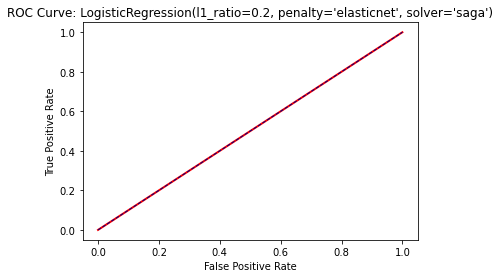

/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating model: LogisticRegression(penalty='none')


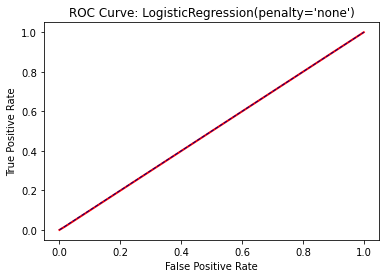

Evaluating model: Perceptron()


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


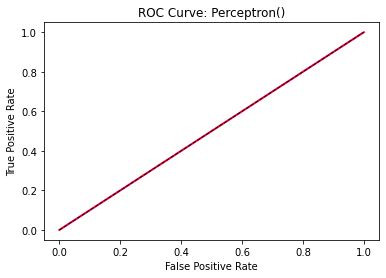

Evaluating model: Perceptron(penalty='l2')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


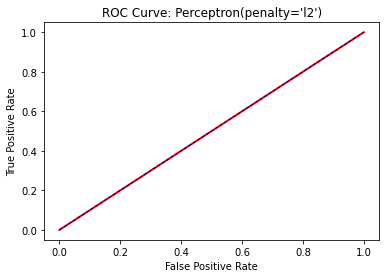

Evaluating model: Perceptron(penalty='l1')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


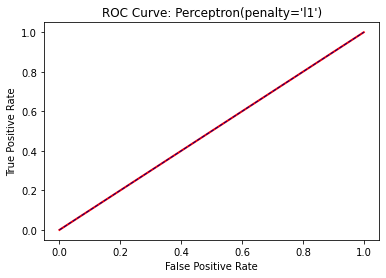

Evaluating model: Perceptron(penalty='elasticnet')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


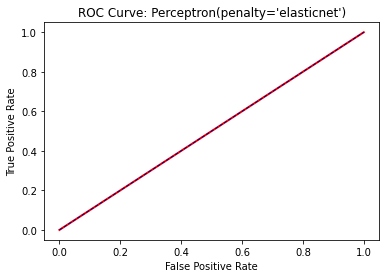

Evaluating model: DecisionTreeClassifier()


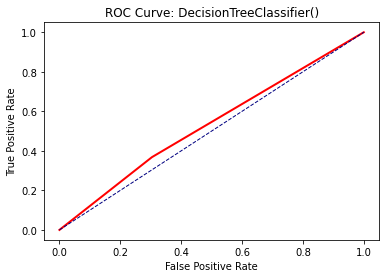

Evaluating model: MLPClassifier()


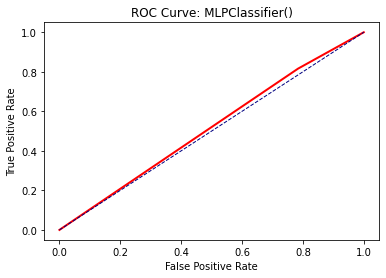

Evaluating model: MLPClassifier(activation='logistic')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


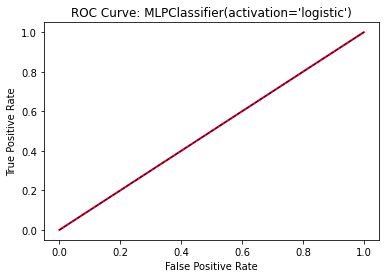

Best Model: SVC(kernel='poly')


,accuracy,precision,recall,roc_score,f1
SVC(kernel='linear'),0.67,0.32,0.05,0.50,0.09
SVC(kernel='poly'),0.68,0.00,0.00,0.50,0.00
SVC(),0.68,0.00,0.00,0.50,0.00
SVC(kernel='sigmoid'),0.68,0.00,0.00,0.50,0.00
LogisticRegression(),0.68,0.30,0.02,0.50,0.03
"LogisticRegression(penalty='l1', solver='liblinear')",0.67,0.35,0.04,0.50,0.08
"LogisticRegression(l1_ratio=0.2, penalty='elasticnet', solver='saga')",0.68,0.00,0.00,0.50,0.00
LogisticRegression(penalty='none'),0.68,0.30,0.02,0.50,0.03
Perceptron(),0.68,0.00,0.00,0.50,0.00
Perceptron(penalty='l2'),0.68,0.00,0.00,0.50,0.00


In [12]:
USER = manager.users[0]
print(manager.user_data(USER)['gostou'].value_counts())
X_train, X_test, y_train, y_test = manager.get_training_data(USER, test_size = 0.2, classification = True, oversampling = None)

classification_scores, best_classification_model = model_eval.evaluate_classification_models(X_train, y_train, X_test, y_test, plot_roc_curve = True)

print(f'Best Model: {best_classification_model}')
classification_scores.round(2)

0    2048
1     355
Name: gostou, dtype: int64
Evaluating model: SVC(kernel='linear')


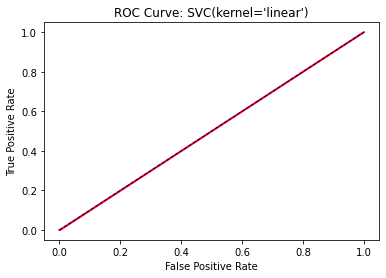

Evaluating model: SVC(kernel='poly')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


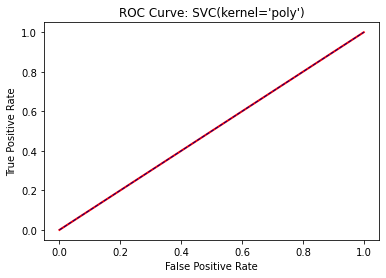

Evaluating model: SVC()


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


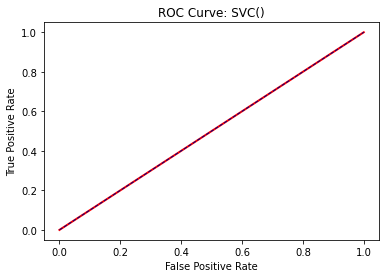

Evaluating model: SVC(kernel='sigmoid')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


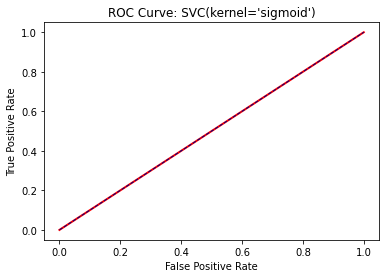

Evaluating model: LogisticRegression()


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


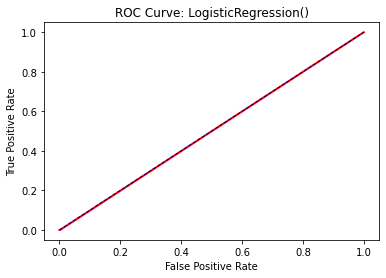

Evaluating model: LogisticRegression(penalty='l1', solver='liblinear')


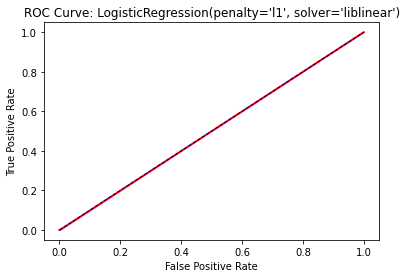

Evaluating model: LogisticRegression(l1_ratio=0.2, penalty='elasticnet', solver='saga')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


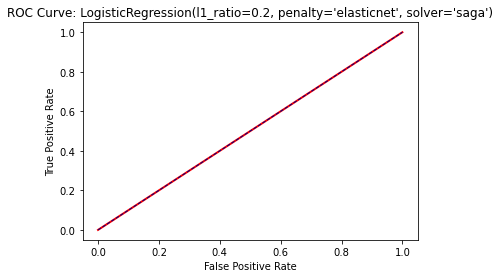

/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating model: LogisticRegression(penalty='none')


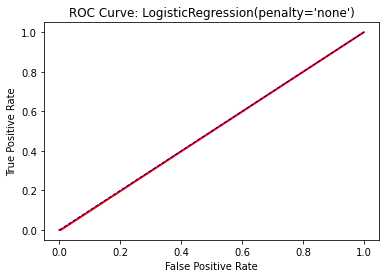

Evaluating model: Perceptron()


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


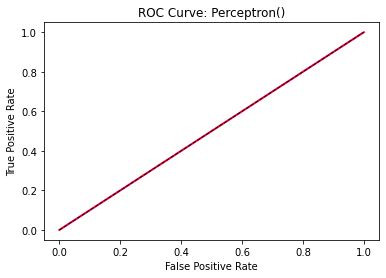

Evaluating model: Perceptron(penalty='l2')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


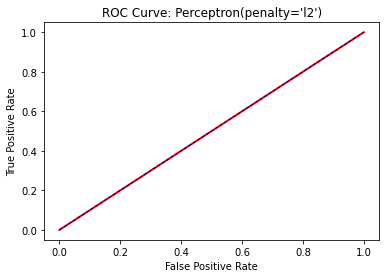

Evaluating model: Perceptron(penalty='l1')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


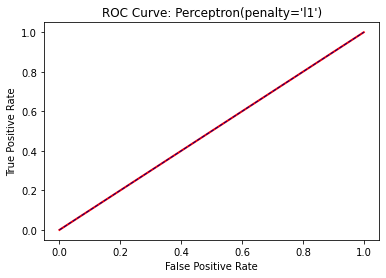

Evaluating model: Perceptron(penalty='elasticnet')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


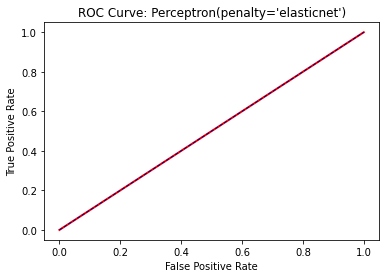

Evaluating model: DecisionTreeClassifier()


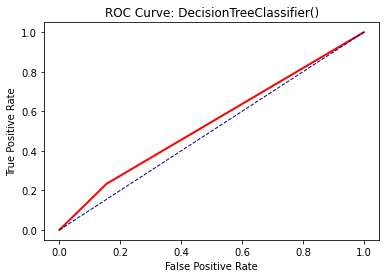

Evaluating model: MLPClassifier()


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


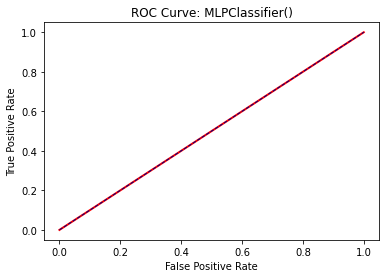

Evaluating model: MLPClassifier(activation='logistic')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


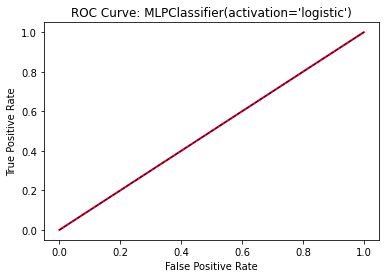

Best Model: SVC(kernel='poly')


,accuracy,precision,recall,roc_score,f1
SVC(kernel='linear'),0.85,0.00,0.00,0.50,0.00
SVC(kernel='poly'),0.85,0.00,0.00,0.50,0.00
SVC(),0.85,0.00,0.00,0.50,0.00
SVC(kernel='sigmoid'),0.85,0.00,0.00,0.50,0.00
LogisticRegression(),0.85,0.00,0.00,0.50,0.00
"LogisticRegression(penalty='l1', solver='liblinear')",0.85,0.00,0.00,0.50,0.00
"LogisticRegression(l1_ratio=0.2, penalty='elasticnet', solver='saga')",0.85,0.00,0.00,0.50,0.00
LogisticRegression(penalty='none'),0.84,0.00,0.00,0.50,0.00
Perceptron(),0.85,0.00,0.00,0.50,0.00
Perceptron(penalty='l2'),0.85,0.00,0.00,0.50,0.00


In [13]:
USER = manager.users[1]
print(manager.user_data(USER)['gostou'].value_counts())
X_train, X_test, y_train, y_test = manager.get_training_data(USER, test_size = 0.2, classification = True, oversampling = None)

classification_scores, best_classification_model = model_eval.evaluate_classification_models(X_train, y_train, X_test, y_test, plot_roc_curve = True)

print(f'Best Model: {best_classification_model}')
classification_scores.round(2)

### Com balanceamento de classes

0    1712
1     860
Name: gostou, dtype: int64
Evaluating model: SVC(kernel='linear')


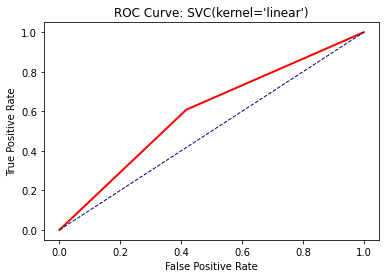

Evaluating model: SVC(kernel='poly')


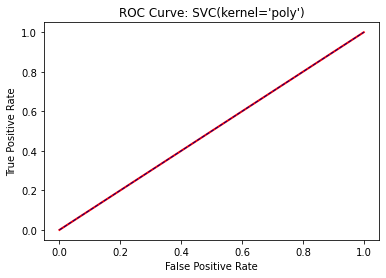

Evaluating model: SVC()


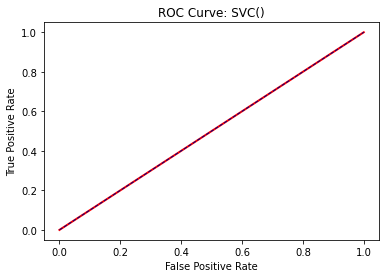

Evaluating model: SVC(kernel='sigmoid')


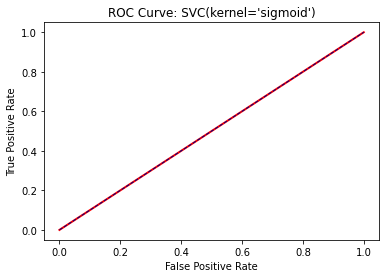

Evaluating model: LogisticRegression()


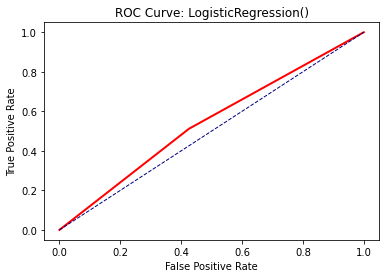

Evaluating model: LogisticRegression(penalty='l1', solver='liblinear')


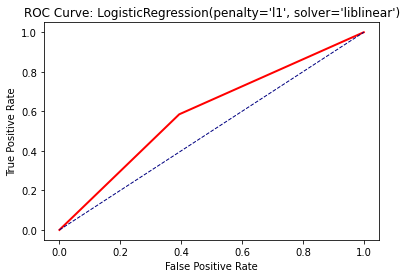

Evaluating model: LogisticRegression(l1_ratio=0.2, penalty='elasticnet', solver='saga')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


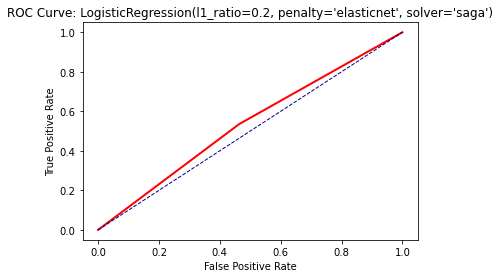

/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating model: LogisticRegression(penalty='none')


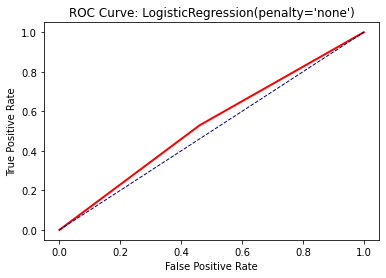

Evaluating model: Perceptron()


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


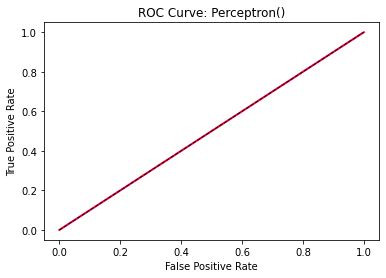

Evaluating model: Perceptron(penalty='l2')


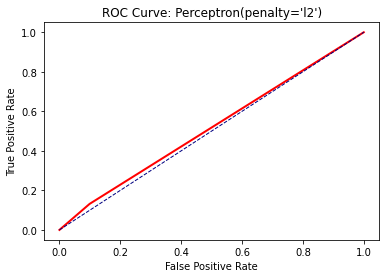

Evaluating model: Perceptron(penalty='l1')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


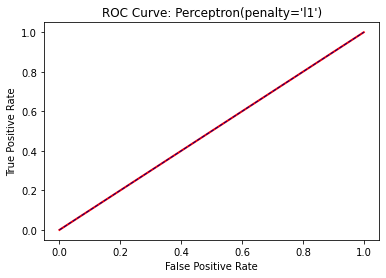

Evaluating model: Perceptron(penalty='elasticnet')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


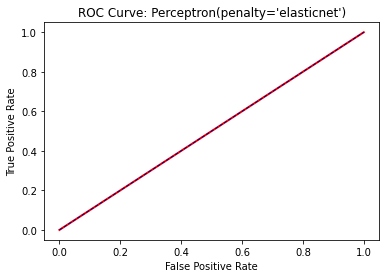

Evaluating model: DecisionTreeClassifier()


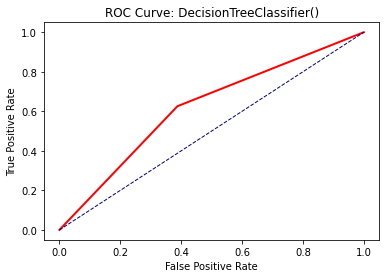

Evaluating model: MLPClassifier()


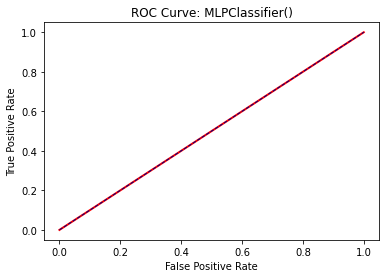

Evaluating model: MLPClassifier(activation='logistic')


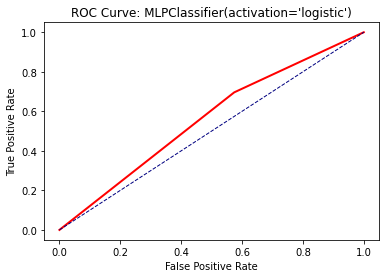

Best Model: DecisionTreeClassifier()


,accuracy,precision,recall,roc_score,f1
SVC(kernel='linear'),0.60,0.59,0.61,0.60,0.60
SVC(kernel='poly'),0.50,0.50,1.00,0.50,0.67
SVC(),0.50,0.50,1.00,0.50,0.67
SVC(kernel='sigmoid'),0.50,0.50,1.00,0.50,0.67
LogisticRegression(),0.54,0.55,0.51,0.54,0.53
"LogisticRegression(penalty='l1', solver='liblinear')",0.60,0.60,0.58,0.60,0.59
"LogisticRegression(l1_ratio=0.2, penalty='elasticnet', solver='saga')",0.54,0.54,0.54,0.54,0.54
LogisticRegression(penalty='none'),0.53,0.53,0.53,0.53,0.53
Perceptron(),0.50,0.00,0.00,0.50,0.00
Perceptron(penalty='l2'),0.52,0.57,0.13,0.52,0.21


In [15]:
USER = manager.users[0]
print(manager.user_data(USER)['gostou'].value_counts())
X_train, X_test, y_train, y_test = manager.get_training_data(USER, test_size = 0.2, classification = True, oversampling = 'SMOTENC')

classification_scores, best_classification_model = model_eval.evaluate_classification_models(X_train, y_train, X_test, y_test, plot_roc_curve = True)

print(f'Best Model: {best_classification_model}')
classification_scores.round(2)

0    2048
1     355
Name: gostou, dtype: int64
Evaluating model: SVC(kernel='linear')


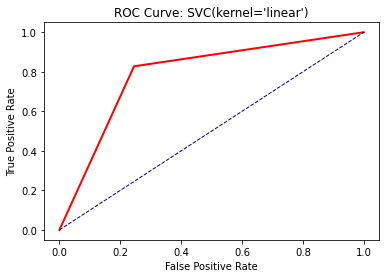

Evaluating model: SVC(kernel='poly')


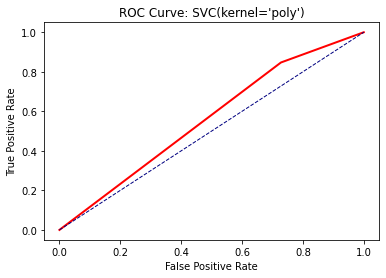

Evaluating model: SVC()


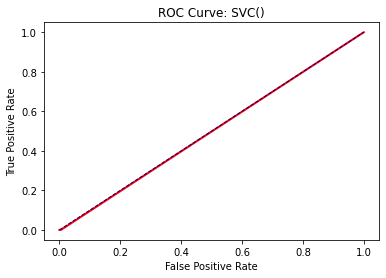

Evaluating model: SVC(kernel='sigmoid')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


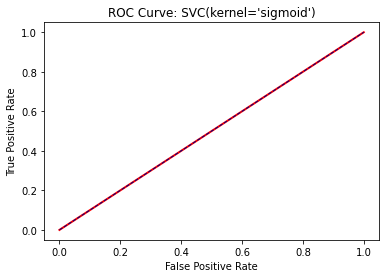

/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating model: LogisticRegression()


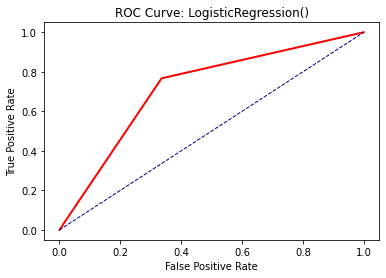

Evaluating model: LogisticRegression(penalty='l1', solver='liblinear')


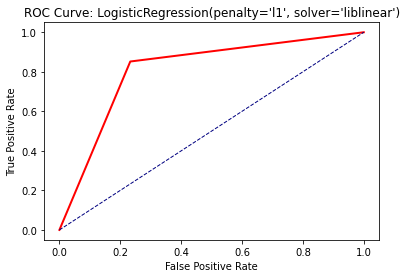

Evaluating model: LogisticRegression(l1_ratio=0.2, penalty='elasticnet', solver='saga')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


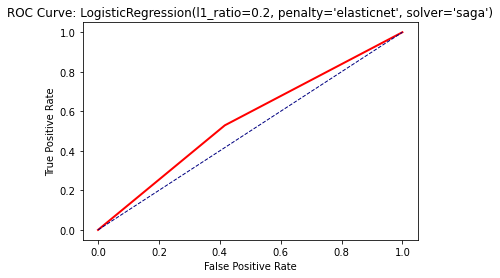

/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating model: LogisticRegression(penalty='none')


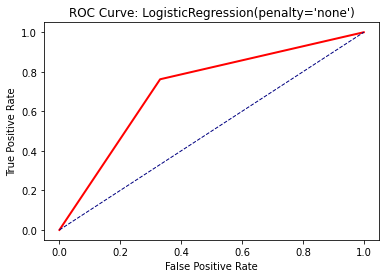

Evaluating model: Perceptron()


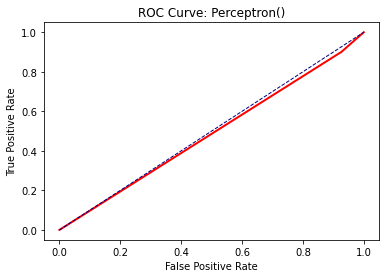

Evaluating model: Perceptron(penalty='l2')


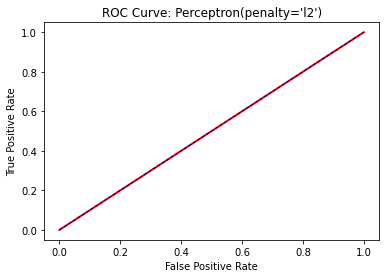

Evaluating model: Perceptron(penalty='l1')


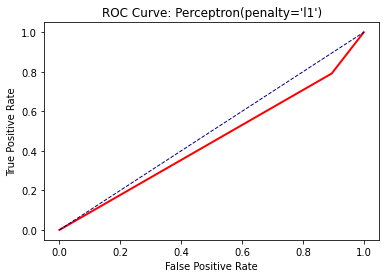

Evaluating model: Perceptron(penalty='elasticnet')


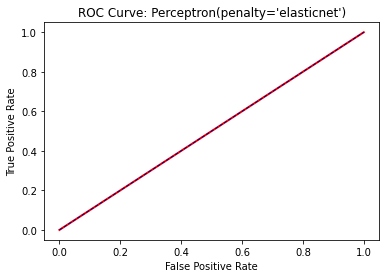

Evaluating model: DecisionTreeClassifier()


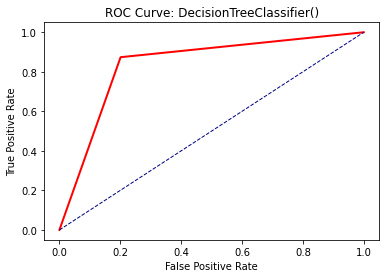

Evaluating model: MLPClassifier()


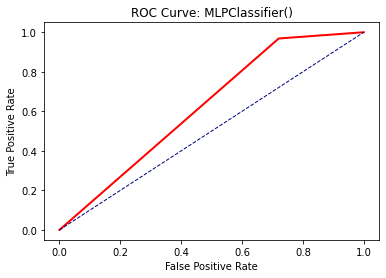

Evaluating model: MLPClassifier(activation='logistic')


/home/patrick/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


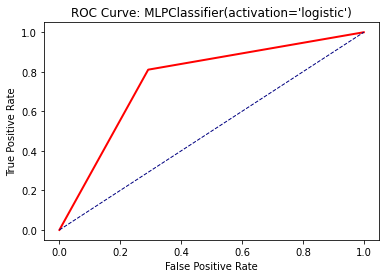

Best Model: DecisionTreeClassifier()


,accuracy,precision,recall,roc_score,f1
SVC(kernel='linear'),0.79,0.77,0.83,0.79,0.80
SVC(kernel='poly'),0.56,0.54,0.85,0.56,0.66
SVC(),0.50,0.00,0.00,0.50,0.00
SVC(kernel='sigmoid'),0.50,0.00,0.00,0.50,0.00
LogisticRegression(),0.72,0.70,0.77,0.72,0.73
"LogisticRegression(penalty='l1', solver='liblinear')",0.81,0.79,0.85,0.81,0.82
"LogisticRegression(l1_ratio=0.2, penalty='elasticnet', solver='saga')",0.56,0.56,0.53,0.56,0.55
LogisticRegression(penalty='none'),0.72,0.70,0.76,0.72,0.73
Perceptron(),0.49,0.50,0.90,0.49,0.64
Perceptron(penalty='l2'),0.50,0.50,1.00,0.50,0.67


In [18]:
USER = manager.users[1]
print(manager.user_data(USER)['gostou'].value_counts())
X_train, X_test, y_train, y_test = manager.get_training_data(USER, test_size = 0.2, classification = True, oversampling = 'SMOTENC')

classification_scores, best_classification_model = model_eval.evaluate_classification_models(X_train, y_train, X_test, y_test, plot_roc_curve = True)
print(f'Best Model: {best_classification_model}')
classification_scores.round(2)

# Avaliação dos modelos de classificação por validação cruzada K-Fold



### Sem Smote

In [54]:
USER = manager.users[0]
print(manager.user_data(USER)['gostou'].value_counts())
X, Y = manager.get_training_data(USER, classification = True, oversampling = None)

classification_scores, best_classification_model = model_eval.evaluate_classification_models(X, Y, evaluate_by = 'cross_validation')

accuracy_mean = {}
accuracy_std  = {}
for model in classification_scores.keys():
    accuracy_mean[model] = classification_scores[model]['accuracy'].mean()
    accuracy_std[model] = classification_scores[model]['accuracy'].std()
    
print(best_classification_model)

df = pd.DataFrame().from_dict(accuracy_mean, orient = 'index')
df.columns = ['mean']
df['std'] = pd.DataFrame().from_dict(accuracy_std, orient = 'index')
df

0    1712
1     860
Name: gostou, dtype: int64
LogisticRegression(penalty='l1', solver='liblinear')


,mean,std
SVC(kernel='linear'),0.658242,0.007139
SVC(kernel='poly'),0.665630,0.000318
SVC(),0.665630,0.000318
SVC(kernel='sigmoid'),0.665630,0.000318
LogisticRegression(),0.661742,0.004026
"LogisticRegression(penalty='l1', solver='liblinear')",0.667571,0.005224
"LogisticRegression(l1_ratio=0.2, penalty='elasticnet', solver='saga')",0.665630,0.000318
LogisticRegression(penalty='none'),0.662907,0.004804
Perceptron(),0.599222,0.132621
Perceptron(penalty='l2'),0.544747,0.149169


In [55]:
USER = manager.users[1]
print(manager.user_data(USER)['gostou'].value_counts())
X, Y = manager.get_training_data(USER, classification = True, oversampling = None)

classification_scores, best_classification_model = model_eval.evaluate_classification_models(X, Y, evaluate_by = 'cross_validation')

accuracy_mean = {}
accuracy_std  = {}
for model in classification_scores.keys():
    accuracy_mean[model] = classification_scores[model]['accuracy'].mean()
    accuracy_std[model] = classification_scores[model]['accuracy'].std()
    
print(best_classification_model)

df = pd.DataFrame().from_dict(accuracy_mean, orient = 'index')
df.columns = ['mean']
df['std'] = pd.DataFrame().from_dict(accuracy_std, orient = 'index')
df

0    2048
1     355
Name: gostou, dtype: int64
MLPClassifier()


,mean,std
SVC(kernel='linear'),0.851852,0.002017
SVC(kernel='poly'),0.852268,0.000151
SVC(),0.852268,0.000151
SVC(kernel='sigmoid'),0.852268,0.000151
LogisticRegression(),0.851020,0.002492
"LogisticRegression(penalty='l1', solver='liblinear')",0.850603,0.002452
"LogisticRegression(l1_ratio=0.2, penalty='elasticnet', solver='saga')",0.852268,0.000151
LogisticRegression(penalty='none'),0.849771,0.003315
Perceptron(),0.288565,0.281759
Perceptron(penalty='l2'),0.288565,0.281759


### Com Smote

In [56]:
USER = manager.users[0]
print(manager.user_data(USER)['gostou'].value_counts())
X, Y = manager.get_training_data(USER, classification = True, oversampling = 'SMOTENC')

classification_scores, best_classification_model = model_eval.evaluate_classification_models(X, Y, evaluate_by = 'cross_validation')

accuracy_mean = {}
accuracy_std  = {}
for model in classification_scores.keys():
    accuracy_mean[model] = classification_scores[model]['accuracy'].mean()
    accuracy_std[model] = classification_scores[model]['accuracy'].std()
    
print(best_classification_model)

df = pd.DataFrame().from_dict(accuracy_mean, orient = 'index')
df.columns = ['mean']
df['std'] = pd.DataFrame().from_dict(accuracy_std, orient = 'index')
df

0    1712
1     860
Name: gostou, dtype: int64
DecisionTreeClassifier()


,mean,std
SVC(kernel='linear'),0.590843,0.032514
SVC(kernel='poly'),0.503510,0.010005
SVC(),0.508480,0.018421
SVC(kernel='sigmoid'),0.503802,0.009064
LogisticRegression(),0.556958,0.018102
"LogisticRegression(penalty='l1', solver='liblinear')",0.601651,0.043353
"LogisticRegression(l1_ratio=0.2, penalty='elasticnet', solver='saga')",0.516352,0.016832
LogisticRegression(penalty='none'),0.558126,0.015220
Perceptron(),0.500876,0.002185
Perceptron(penalty='l2'),0.499708,0.000876


In [57]:
USER = manager.users[1]
print(manager.user_data(USER)['gostou'].value_counts())
X, Y = manager.get_training_data(USER, classification = True, oversampling = 'SMOTENC')

classification_scores, best_classification_model = model_eval.evaluate_classification_models(X, Y, evaluate_by = 'cross_validation')

accuracy_mean = {}
accuracy_std  = {}
for model in classification_scores.keys():
    accuracy_mean[model] = classification_scores[model]['accuracy'].mean()
    accuracy_std[model] = classification_scores[model]['accuracy'].std()
    
print(best_classification_model)

df = pd.DataFrame().from_dict(accuracy_mean, orient = 'index')
df.columns = ['mean']
df['std'] = pd.DataFrame().from_dict(accuracy_std, orient = 'index')
df

0    2048
1     355
Name: gostou, dtype: int64
LogisticRegression(penalty='l1', solver='liblinear')


,mean,std
SVC(kernel='linear'),0.794462,0.059177
SVC(kernel='poly'),0.544681,0.014873
SVC(),0.508781,0.017080
SVC(kernel='sigmoid'),0.505609,0.012439
LogisticRegression(),0.711932,0.037395
"LogisticRegression(penalty='l1', solver='liblinear')",0.804963,0.064053
"LogisticRegression(l1_ratio=0.2, penalty='elasticnet', solver='saga')",0.580812,0.011906
LogisticRegression(penalty='none'),0.728531,0.034371
Perceptron(),0.518071,0.035235
Perceptron(penalty='l2'),0.506838,0.013378


# Avaliação dos modelos de regressão por train_test_split

In [67]:
USER = manager.users[0]
print(manager.user_data(USER)['gostou'].value_counts())
X_train, X_test, y_train, y_test = manager.get_training_data(USER, test_size = 0.2, classification = False)

regression_scores, best_regression_models = model_eval.evaluate_regression_models(X_train, y_train, X_test, y_test)

print(best_regression_models)
regression_scores

0    1712
1     860
Name: gostou, dtype: int64
LinearRegression()


,mae,mse,rmse
SVR(kernel='linear'),1.492480,3.778836,1.943923
SVR(kernel='poly'),1.295775,3.033353,1.741652
SVR(),1.298255,3.026902,1.739799
SVR(kernel='sigmoid'),1.299927,3.024496,1.739108
LinearRegression(),1.316848,2.905608,1.704585
DecisionTreeRegressor(),1.778641,5.130097,2.264972
MLPRegressor(),1.332896,2.940547,1.714802


In [73]:
best_regression_models.predict(X_test).astype(int)

array([3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 2, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3,

In [60]:
USER = manager.users[1]
print(manager.user_data(USER)['gostou'].value_counts())
X_train, X_test, y_train, y_test = manager.get_training_data(USER, test_size = 0.2, classification = False)

regression_scores, best_regression_models = model_eval.evaluate_regression_models(X_train, y_train, X_test, y_test)

print(best_regression_models)
regression_scores

0    2048
1     355
Name: gostou, dtype: int64
LinearRegression()


,mae,mse,rmse
SVR(kernel='linear'),1.323325,3.068932,1.751837
SVR(kernel='poly'),1.175874,2.711516,1.646668
SVR(),1.177829,2.715364,1.647836
SVR(kernel='sigmoid'),1.178378,2.716523,1.648188
LinearRegression(),1.201895,2.701199,1.643532
DecisionTreeRegressor(),1.742204,5.284823,2.298874
MLPRegressor(),1.216217,2.715148,1.647771


# Avaliação dos modelos de regressão por cross validation

In [65]:
USER = manager.users[0]
print(manager.user_data(USER)['gostou'].value_counts())
X, Y = manager.get_training_data(USER, classification = False)

regression_scores, best_regression_model = model_eval.evaluate_regression_models(X, Y, evaluate_by = 'cross_validation')

mse_mean = {}
mse_std  = {}
for model in regression_scores.keys():
    mse_mean[model] = regression_scores[model]['mse'].mean()
    mse_std[model] = regression_scores[model]['mse'].std()
    
print(best_regression_model)

df = pd.DataFrame().from_dict(mse_mean, orient = 'index')
df.columns = ['mean']
df['std'] = pd.DataFrame().from_dict(mse_std, orient = 'index')
df

0    1712
1     860
Name: gostou, dtype: int64
LinearRegression()


,mean,std
SVR(kernel='linear'),3.049611,0.241305
SVR(kernel='poly'),2.600028,0.180182
SVR(),2.598439,0.179830
SVR(kernel='sigmoid'),2.598824,0.179731
LinearRegression(),2.550557,0.161333
DecisionTreeRegressor(),5.169881,0.170138
MLPRegressor(),2.649404,0.260977


In [66]:
USER = manager.users[1]
print(manager.user_data(USER)['gostou'].value_counts())
X, Y = manager.get_training_data(USER, classification = False)

regression_scores, best_regression_model = model_eval.evaluate_regression_models(X, Y, evaluate_by = 'cross_validation')

mse_mean = {}
mse_std  = {}
for model in regression_scores.keys():
    mse_mean[model] = regression_scores[model]['mse'].mean()
    mse_std[model] = regression_scores[model]['mse'].std()
    
print(best_regression_model)

df = pd.DataFrame().from_dict(mse_mean, orient = 'index')
df.columns = ['mean']
df['std'] = pd.DataFrame().from_dict(mse_std, orient = 'index')
df

0    2048
1     355
Name: gostou, dtype: int64
LinearRegression()


,mean,std
SVR(kernel='linear'),3.114367,0.210303
SVR(kernel='poly'),2.486393,0.228240
SVR(),2.489300,0.227111
SVR(kernel='sigmoid'),2.490312,0.226505
LinearRegression(),2.477645,0.204434
DecisionTreeRegressor(),5.146406,0.431066
MLPRegressor(),2.553154,0.165393
